# Latent Dirichlet Allocation (LDA)

LDA is a **probabilistic model.** This means the LDA algorithm generates topics, **classifying words and documents among these different topics**, according to probability distributions. But why is this an appropriate method for uncovering hidden thematic structures in text data? Essentially, **LDA assumes documents have been generated through random sampling of pre-document topics, and it attempts to reverse engineer this sampling**

LDA’s **imagined generative text process begins with pre-document topics. Each topic is fixed vocabulary of words, in which each word has a probability that it belongs to that topic. Note that words are assigned probabilities rather than a discrete category to account for potential plurality of meaning and use. Then, to create a text document, the machine randomly generates a distribution over topics**—for example, eighty-five percent politics, ten percent finance, five percent history. For each word in this document, the machine randomly selects one of the chosen topics and randomly emits a word from that topic. Note that LDA does not itself generate documents this way. Rather, this is the process by which LDA assumes documents are generated. LDA itself attempts to reverse this process to uncover the overarching and hidden topics pervading a corpus of documents.

This figure illustrates the assumed text generation process underlying LDA:


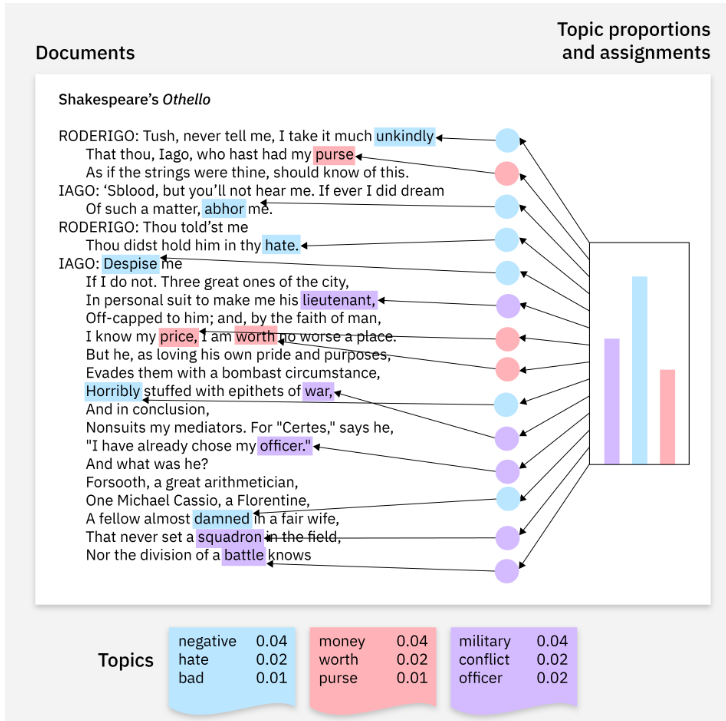


At the bottom of this image are a random assortment of topics comprised of a word distribution. These topics exist for every document in the collection. To generate a given document (in this example, Shakespeare’s Othello), the machine generates a distribution of topics, which is the graph on the far right. This distribution is topics (and proportion for each) that will comprise the document. For each word in the document, the machine randomly selects one of the chosen topics (the column of colored dots), from which it in turn randomly chooses a word (the highlighted terms).2 Note this visualization is only an illustrative example, not the result of any actual topic modeling or text generation. As mentioned, however, LDA assumes every document is generated by this general generative process, which LDA attempts to reverse engineer.

# How latent Dirichlet allocation works
Much like other topic modeling approaches, such as latent semantic analysis (LSA), LDA approaches documents across corpora as bag of words. This means LDA ignores word order and context.**Instead, it focuses on how often words occur and co-occur within each individual document.3 Word frequency and co-occurrence are modeled in the document-term matrix**. Here, documents are rows and individual words are columns, or vice-versa. Each cell’s value indicates the frequency with which a given word appears in each document.4

Topic generation
Using the document-term matrix, the LDA algorithm generates topic distributions (that is lists of keywords with respective probabilities) according to word frequency and co-occurrences. By tracking frequency of co-occurrence, LDA assumes words that occur together are likely part of similar topics. **The algorithm then assigns document-topic distributions based on the clusters of words that appear in the given document.**

For example, say we generate a LDA model for a collection of news articles that has the following partial output

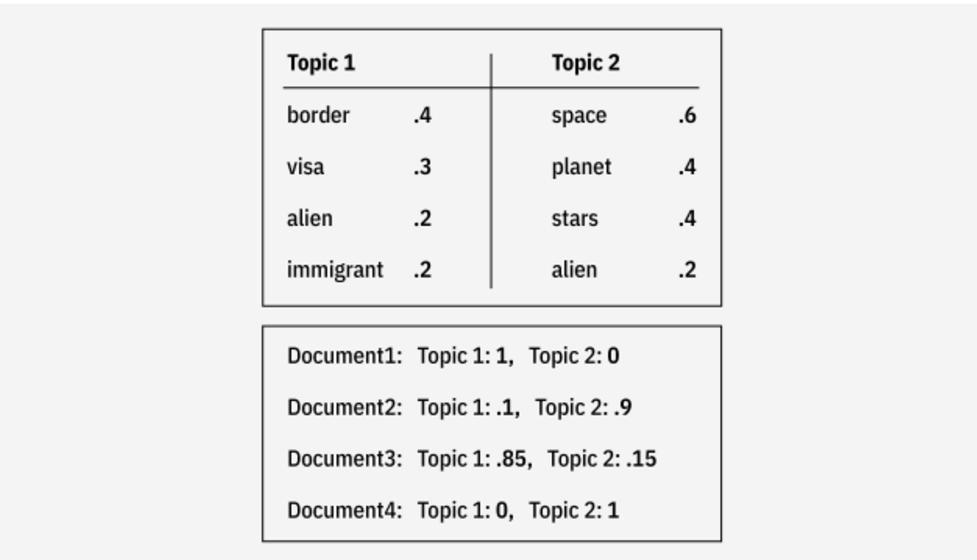

Here, we have two topics that may likely be described as immigration (Topic 1) and astronomy (Topic 2). The scores attached to each word are the probability of that keyword appearing in its given topic. The probabilities attached to each document are that document’s respective probabilities of belonging to a mixture of topics given the distribution and co-occurrence of words from each topic within that document. For example, the table’s first row lists border under Topic 1 with a 40% probability and space in Topic 2 with a 60% probability. These percentages indicate the probability of their respective terms occurring in that topic across the whole corpus. The first document row reads Document 1: Topic 1: .95, Topic 2: .05. This means that, based the occurrence of words in Document 1, the model projects Document 1 as being 95% derived from Topic 1 and 5% derived from Topic 2. In other words, our hypothetical LDA model assumes these are the topics and proportions of those topics used to generate the model.

Of course, polysemous words in particular create problems for such discrete categorizations—for example, alien may refer to a human immigrant or an extra-terrestrial creature. In such cases, how does the LDA algorithm determine to which topic the word (and by extension, the document) belongs?

# Gibbs formula

When assigning topics to words, the LDA algorithm uses what is known as Gibbs sampling. The Gibbs sampling formula is:

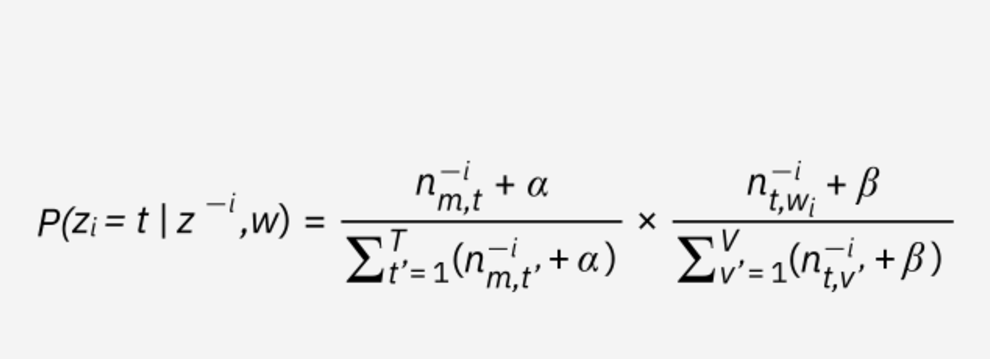

 The algorithm calculates this probability according to the number of words in document d that belong to topic t. This essentially asks: how prevalent is topic t in document d?
The second ratio expresses the probability of word w belonging to topic t. The algorithm calculates this probability by enumerating the occurrences of w in t over all word-tokens in t. This asks: with what frequency does word w appear in topic t throughout the rest of the corpus?
Note that Gibbs sampling is an iterative process. That is, a word is not sampled once, assigned a topic, and tossed aside. Rather, Gibbs sampling passes each word through multiple iterations, updating topic-word probabilities in light of one another.6

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Data

In [5]:
npr=pd.read_csv("/content/npr.csv")
npr.head(5)

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


# CountVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(npr['Article'])

In [9]:
# Access feature names
len(cv.get_feature_names_out())


54777

In [10]:
import random

# Loop to randomly select and print 10 words from the vocabulary
for i in range(10):
    # Generate a random integer within the range of the vocabulary size
    random_word_id = random.randint(0, len(cv.get_feature_names_out()) - 1)

    # Print the word corresponding to the random index from the vocabulary
    print(cv.get_feature_names_out()[random_word_id])


nangarhar
philosophers
mockery
mezvinsky
surgeon
stature
neurologist
spector
gottlieb
tonight


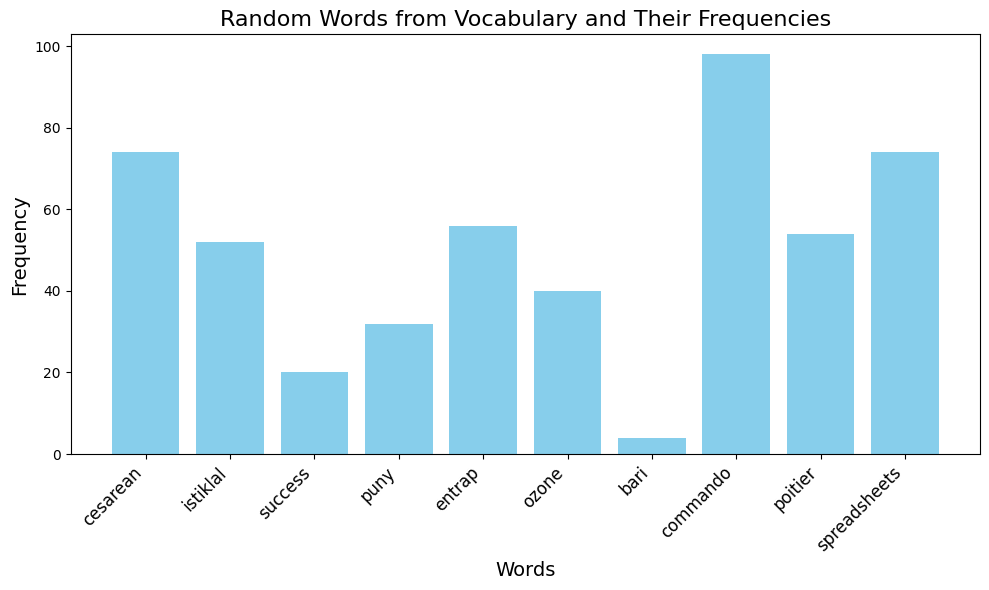

In [11]:
# Generate 10 random words from the vocabulary
random_words = []
for i in range(10):
    random_word_id = random.randint(0, len(cv.get_feature_names_out()) - 1)
    random_words.append(cv.get_feature_names_out()[random_word_id])

# Count occurrences of each word (dummy data for visualization if needed)
# If frequency information is available, use it; here we assign random frequencies
random_frequencies = [random.randint(1, 100) for _ in random_words]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(random_words, random_frequencies, color='skyblue')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Random Words from Vocabulary and Their Frequencies', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


# Latent Dirichlet Allocation

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the LDA model
LDA = LatentDirichletAllocation(
    n_components=7,  # Number of topics to discover
    random_state=42  # Ensures reproducibility of results
)

# Fit the LDA model to the document-term matrix (DTM)
LDA.fit(dtm)


LatentDirichletAllocation(n_components=7, random_state=42)

In [13]:
len(LDA.components_)

7

In [14]:
LDA.components_

array([[8.64332806e+00, 2.38014333e+03, 1.42900522e-01, ...,
        1.43006821e-01, 1.42902042e-01, 1.42861626e-01],
       [2.76191749e+01, 5.36394437e+02, 1.42857148e-01, ...,
        1.42861973e-01, 1.42857147e-01, 1.42906875e-01],
       [7.22783888e+00, 8.24033986e+02, 1.42857148e-01, ...,
        6.14236247e+00, 2.14061364e+00, 1.42923753e-01],
       ...,
       [3.11488651e+00, 3.50409655e+02, 1.42857147e-01, ...,
        1.42859912e-01, 1.42857146e-01, 1.42866614e-01],
       [4.61486388e+01, 5.14408600e+01, 3.14281373e+00, ...,
        1.43107628e-01, 1.43902481e-01, 2.14271779e+00],
       [4.93991422e-01, 4.18841042e+02, 1.42857151e-01, ...,
        1.42857146e-01, 1.43760101e-01, 1.42866201e-01]])

In [16]:
len(LDA.components_)        # Returns 7 (the number of topics)
len(LDA.components_[0])     # Returns 50000 (the size of the vocabulary)


54777

In [15]:
single_topic = LDA.components_[0]  # Get the word distribution for the first topic
single_topic.argsort()             # Returns the indices that would sort the array


(7, 54777)

In [18]:
# Get the word distribution for the first topic (0th index)
single_topic = LDA.components_[0]

# Sort the words by importance in the first topic and get the top 10
top_word_indices = single_topic.argsort()[-10:]  # Indices of the top 10 words
top_words = [cv.get_feature_names_out()[i] for i in top_word_indices]  # Get the words
print(top_words)

['new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


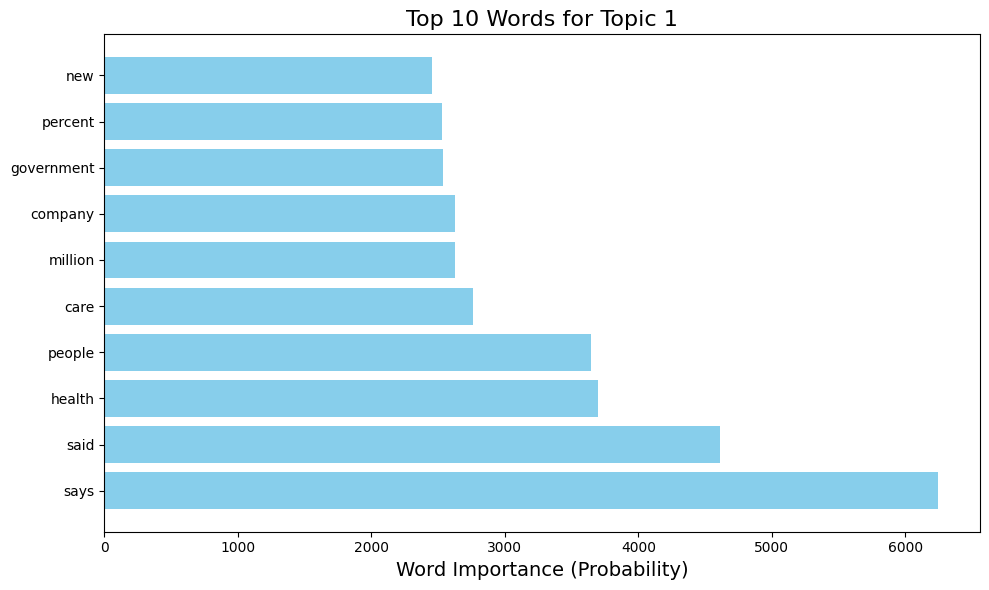

In [20]:
# Get the word distribution for the first topic
single_topic = LDA.components_[0]

# Get the indices of the top 10 words (highest probabilities)
top_word_indices = single_topic.argsort()[-10:]

# Get the top 10 words and their probabilities
top_words = [cv.get_feature_names_out()[i] for i in top_word_indices]
top_word_probs = [single_topic[i] for i in top_word_indices]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_word_probs, color='skyblue')
plt.xlabel('Word Importance (Probability)', fontsize=14)
plt.title('Top 10 Words for Topic 1', fontsize=16)
plt.gca().invert_yaxis()  # Reverse the order to display the most important word on top
plt.tight_layout()
plt.show()


In [22]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


THE TOP 15 WORDS FOR TOPIC #3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


THE TOP 15 WORDS FOR TOPIC #4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think',

In [23]:
topic_results = LDA.transform(dtm)
topic_results.shape # Outputs: (number_of_documents, number_of_topics)

(11992, 7)

In [24]:
topic_results[0].round(2)

array([0.02, 0.68, 0.  , 0.  , 0.3 , 0.  , 0.  ])

In [25]:
topic_results.argmax(axis=1)

array([1, 1, 1, ..., 3, 4, 0])

In [26]:
# Assign the most dominant topic to each document based on the topic proportions
# `argmax(axis=1)` finds the index of the topic with the highest proportion for each document.
npr['Topic'] = topic_results.argmax(axis=1)

# Display the first 10 rows of the DataFrame with the newly added 'Topic' column
npr.head(10)

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2
5,I did not want to join yoga class. I hated tho...,3
6,With a who has publicly supported the debunk...,3
7,"I was standing by the airport exit, debating w...",2
8,"If movies were trying to be more realistic, pe...",3
9,"Eighteen years ago, on New Year’s Eve, David F...",2
